# Procesamiento de datos
Clase: 8

## Indice
1. Repaso: Train test split <br>
2. Repaso: Cross validation <br>
3. Pipelines <br>
3.2 Ejemplo de pipeline con una variable numérica <br>
3.2 Ejemplo de pipeline con varias variables <br>


Antes de empezar, importamos los paquetes que vamos a utilizar:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Train-test split

En el contexto de preparación de datos para su aplicación en modelos de Machine Learning, necesitaremos cumplir con la metodología  propia de Machine Learning. Uno de los aspectos básicos de esta metodología es dividir el conjunto de datos de los que disponemos en un conjunto de entrenamiento y en un conjunto de test.

Todo el entrenamiento del modelo, ajuste de hiperparámetros y pruebas de preprocesado de datos se deben hacer y evaluar en el conjunto de entrenamiento.

El conjunto de test lo utilizaremos para, una vez elegido y entrenado el modelo, elegidos los hiperparámetros y elegidos y entrenados los pasos de preprocesado, obtener una estimación de cómo se comportaría ese pipeline frente a datos desconocidos del mundo real.

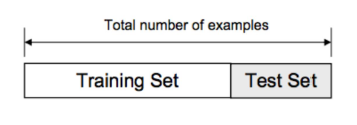

En scikit-learn, podemos llamar a la función train_test_split.




## 2. Cross validation

Para poder ajustar hiperparámetros y decidir entre distintos
tipos de preprocesado, necesitaremos definir un conjunto de
validación dentro del conjunto original de entrenamiento
Para tener una estadística más completa, podemos repetir el
entrenamiento varias veces, definiendo cada vez un conjunto
de validación diferente. 
A esto se le conoce como cross validation, que entra dentro
de las técnicas de remuestreo (resampling methods)

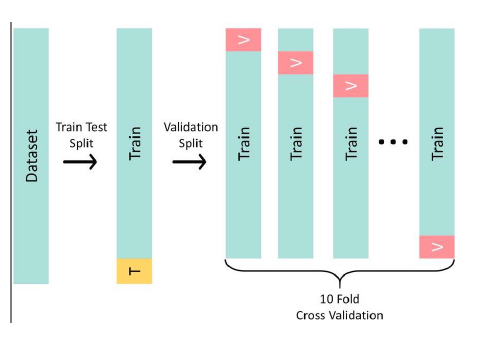

En Python, podemos aplicar cross validation usando el método cross_val_score de scikit-learn
Este método necesita como entrada el modelo que se va a utilizar, los valores de X_train e y_train y el número de veces que se va a repetir el entrenamiento usando conjuntos de validación diferentes
Devuelve los valores de la métrica en cada conjunto de validación

Por ej.

logregcv = LogisticRegression(C=0.8) <br>
cross_val_score(logregcv, X_train, y_train, cv=5)



## 3. Pipelines

Desde la perspectiva de la preparación de datos, será necesario estructurar las transformaciones
de datos en Pipelines. 
Estos Pipelines garantizan que la información del conjunto de validación no se tomará en cuenta a la hora de definir
las transformaciones y entrenar el modelo.
Pipeline nos ofrecerá una forma compacta de manejar modelos y transformaciones para aplicarlos directamente a
los datos que queremos predecir.


Por ejemplo, podemos introducir en el Pipeline el método PowerTransformer de scikit-learn para aplicar transformaciones de Box-Cox a las variables del problema.

Una vez que  ya hemos seleccionado hiperparámetros y preprocesados y los hemos comparado a través de cross validations,
podemos entrenar el Pipeline con el conjunto de entrenamiento completo y realizar la predicción sobre el conjunto
de test usando el método predict

## 3.1 Ejemplo de Pipeline con el Iris data set

**Ejercicio:** : Carga el data set de las flores iris y muestra los cuatro últimos registros.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**Ejercicio:** Crea una variable X, y donde X es PetalLengthcm y la variable y es la PetalWidthcm. Puedes usar drop, pero recuerda especificar el eje. Crea una gráfica de scatter. Crees que se puede aproximar la anchura y la longitud de forma lineal? Porque?

**Ejercicio:** Separa los datos en train y test usando scikit-learn.

**Ejercicio:** Carga Pipeline, de scikit learn. Crea una Pipeline en el que se aplique un escalado y después una regresión lineal. Comprueba que al hacer fit, te devuelve los pasos que siguen los datos al pasar por el pipeline.

**Ejercicio:** Como puedes estimar lo bien que ha funcionado el modelo? Representa los resultados de la predicción de forma gráfica, pero también con un número, que métrica puedes usar?

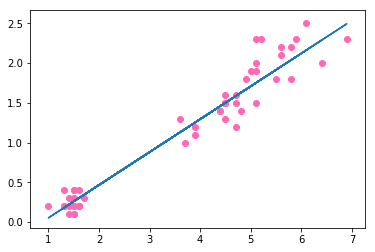

**Ejercicio:** Que pasa si utilizar otro escalado diferente? Y si haces una transformada de Box-Cox de los datos? Como afecta al modelo?

Las transformaciones que se declaran en el Pipeline afectan
sólo a las variables del problema. Si queremos transformar la
target (en un problema de regresión, por ejemplo) debemos
utilizar el método TransformedTargetRegressor

## 3.2 Pipelines con varios tipos de variables

**Ejercicio:** Para practicar con datos reales, carga el dataset 'CAR DETAILS FROM CAR DEKHO.csv' de la web:

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

Cárgalo con el nombre df. Muestra las tres primeras filas o registros del dataset.

In [44]:
url = "https://raw.githubusercontent.com/guptaashray/Car-Price-Prediction/master/CAR%20DETAILS%20FROM%20CAR%20DEKHO.csv"
df = pd.read_csv(url)
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner


**Ejercicio:** Como por el momento no nos da mucho juego, elimina la columna o variable 'name' del dataframe.

**Ejercicio:** Saca la lista Index de columnas o variables del dataframe:

**Ejercicio:** Carga la librería seaborn y haz un pairplot del dataframe para viasualizar las distribuciones de las variables numéricas y como se relacionan entre ellas.

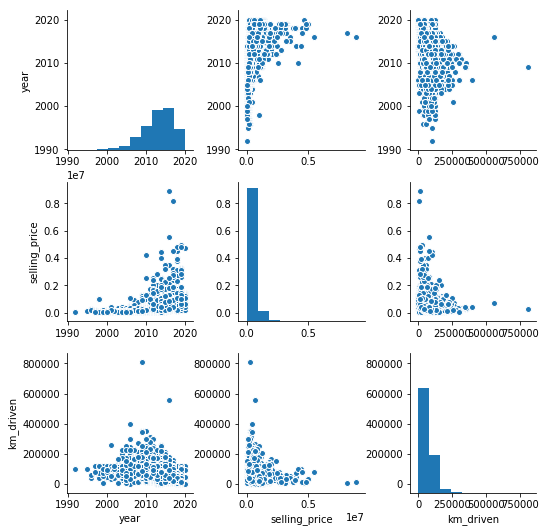

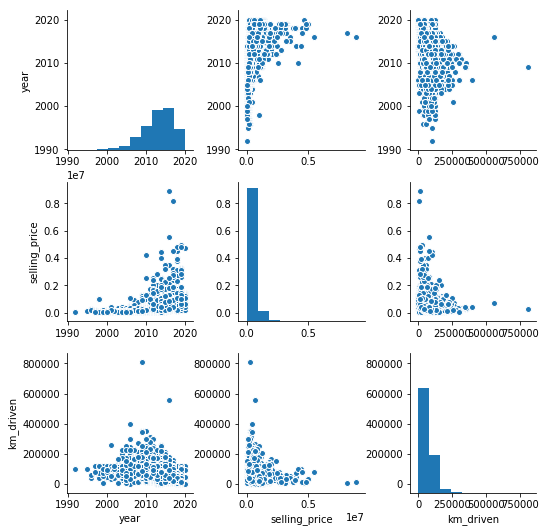

**Ejercicio:** Vamos a utilizar este conjunto de datos como un conjunto para practicar regresiones, en el que intentaremos predecir el precio. Para ello vamos a dividir el dataframe en dos, un subconjunto llamado X del que quitaremos la variable selling_price, y otro subconjunto y que contendrá solo esta variable. Puedes usar .drop por ejemplo.

**Ejercicio:** Ahora podemos utilizar train_test_split para dividir el set en un subconjunto de entrenamiento X_train, y_train y un subconjunto de test X_test,y_test. 
Definimos el tamaño del conjunto de test. Esto depende del tamaño del dataset. Normalmente se utiliza algo entre 0.20 y 0.33
Importante: Podemos definir el random_state, la semilla de los números aleatorios. Esto será crucial para replicar los resultados y buscar errores.

**Ejercicio: ** Train_test_split hace divisiones estratificadas por defecto. Esto significa que, en problemas de clasificación, y_train e y_test tendrán, aproximadamente, la misma proporción de elementos de la clase 0 y la clase 1. Como comprobarias esto?
Si tenemos un problema de regresion, como podemos comprobar que la distribución es parecida? Demuestrado.

**Pregunta:** Que variables son numéricas, y que variables son categóricas? Que opciones se te ocurren para codificar las variables categóricas?

**Ejercicio:** Vamos a montar un Pipeline de ejemplo. Para ello: <br>
a) Crea tres listas con nombres de variables. La primera num_feats contendrá el nombre 'km_driven', la segunda num_feats_np contendrá el nombre de la variable 'year', y la tercera cat_feats contendra las variables categóricas.
b) Crea el Pipeline numeric_trans en el que vamos a integrar dos pasos. Primero una transformada box-cox. Después un escalado estandard. Puedes llamar a los pasos 'power transformer' y 'scaler', respectivamente.
c) Crea el Pipeline numeric_trans_np con un escalado estandard. Puedes llamar a este paso 'scaler'.
d) Crea el Pipeline categorical_trans con una codificación OneHot. Recuerda elimiar la primera columna. Puedes llamar a este paso 'one-hot encoder'.
e) Vamos a integrar todas las transformaciones con ColumnTransformer, donde incluiremos todas estas transformaciones, asociadas a las distintas listas de variables. Usa remainder='passthrough'.
f) Finalmente, usa pipeline para agrupar las transformaciones con el nombre 'transform_columns', y el modelo de regresión lineal.
g) Haz un .fit(X_train, y_train). Esto te devolverá todos los pasos de la pipeline por los que pasan los datos.


**Ejercicio:** Ahora tenemos que evaluar el resultado. Como podemos hacer una predicción de los datos de X_test? Como podemos hacer una estimación del error?

**Ejercicio:** Carga cross_val_score desde sklearn.model_selection. Utilizalo sobre la pipeline que hemos creado con cv = 5. 

**Ejercicio:** Que cambios se te ocurre hacer en el pipeline para mejor estos resultados? Demuestralo. 